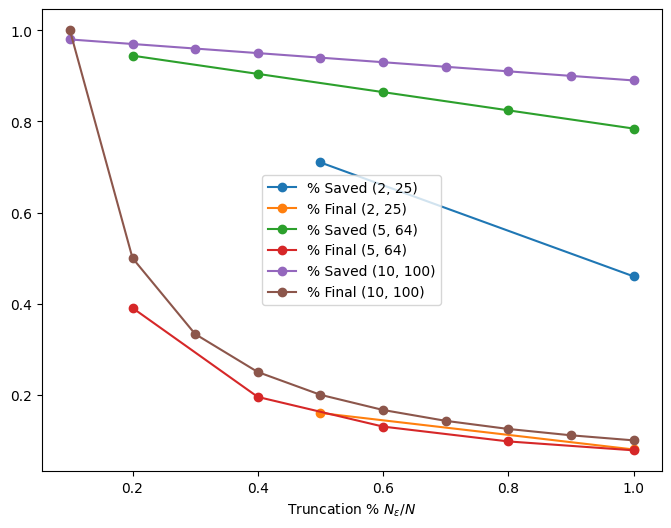

In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
def plotter(N=5, G=64):
    N_eps_values = np.arange(1, N + 1)
    # Each tier costs the same amount.
    tier_cost = G
    # Full cost (no savings)
    cost_full = G*N**2
    # Tiered costs and savings
    tiered_costs = np.array([n * tier_cost + N**2 for n in N_eps_values])
    percent_final = np.array([N**2/(n * tier_cost) for n in N_eps_values])
    percent_saved = 1 - tiered_costs / cost_full  # Fraction saved
    percent_saved = np.clip(percent_saved, 0, 1)  # Ensure no negatives
    plt.plot(N_eps_values/np.max(N_eps_values), percent_saved, marker='o', linestyle='-', label=f'% Saved ({N}, {G})')
    plt.plot(N_eps_values/np.max(N_eps_values), percent_final, marker='o', linestyle='-', label=f'% Final ({N}, {G})')
for (N,G) in [(2,25), (5, 64), (10, 100)]:
    plotter(N, G)
plt.xlabel('Truncation % $N_{\epsilon}/N$')
plt.legend()


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Fixed N
# N = 5

# # Vary N_epsilon from 1 to 5
# N_eps_values = np.arange(2, N + 2)

# # Compute target width safely
# with np.errstate(divide='ignore', invalid='ignore'):
#     log_term = np.log(N_eps_values)
#     ratio_sq = (N_eps_values / N)**2
#     target = 1 / (log_term * ratio_sq)

# # Mask or ignore invalid values (e.g., log(1)=0 causes div-by-zero)
# target[~np.isfinite(target)] = np.nan

# # Normalize (optional, as in your 2D plot)
# target_normalized = target / np.nanmax(target)

# # Plot
# plt.figure(figsize=(7, 5))
# plt.plot((N_eps_values-1)/np.max(N_eps_values-1), target_normalized, marker='o', linestyle='-')
# #plt.yscale('log')
# plt.xlabel(r'Percent Level of Final Sweep  $(N_\epsilon/N)$')
# plt.ylabel(r'Percent of Compute spent on Final Run')
# plt.title(r'Percent of Compute Spent on Final Run (Fixed $N=5$)')
# plt.grid(True, which='both', ls='--', lw=0.5)
# plt.tight_layout()
# plt.show()


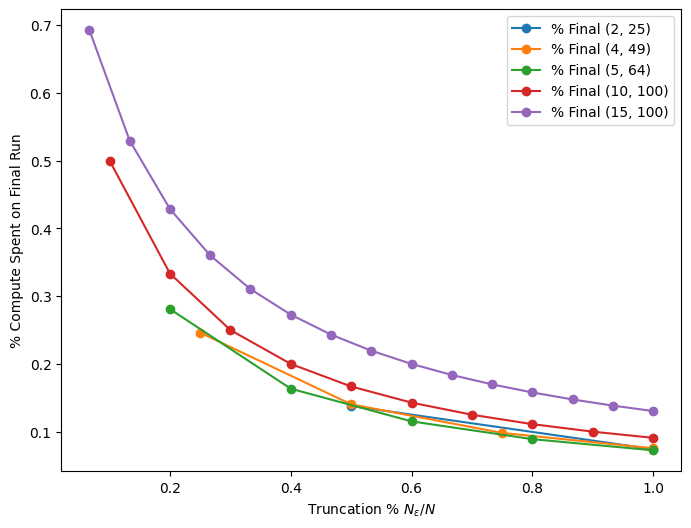

In [3]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
def plotter(N=5, G=64):
    N_eps_values = np.arange(1, N + 1)    
    # Full cost (no savings)
    cost_full = G*N**2
    # Tiered costs and savings
    tiered_costs = np.array([n * G + N**2 for n in N_eps_values])
    percent_final = np.array([N**2/(N**2 + n * G) for n in N_eps_values])
    plt.plot(N_eps_values/np.max(N_eps_values), percent_final, marker='o', linestyle='-', label=f'% Final ({N}, {G})')
for (N,G) in [(2,25), (4, 49), (5, 64), (10, 100), (15, 100)]:
    plotter(N, G)
plt.xlabel('Truncation % $N_{\epsilon}/N$')
plt.ylabel('% Compute Spent on Final Run')
plt.legend()


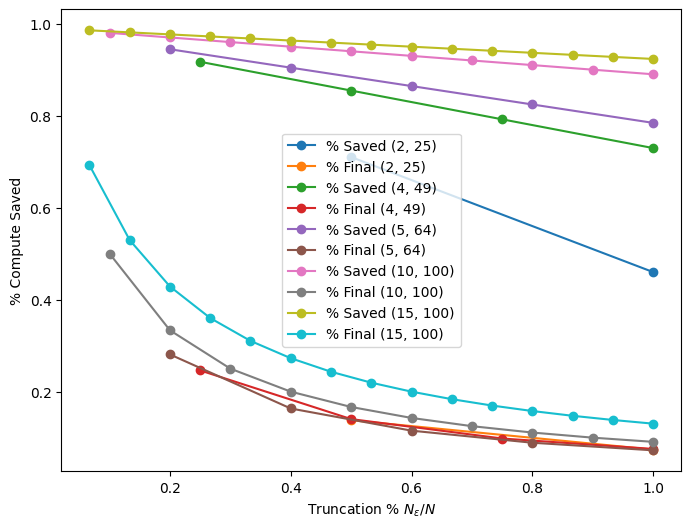

In [4]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
def plotter(N=5, G=64):
    N_eps_values = np.arange(1, N + 1)
    # Each tier costs the same amount.
    tier_cost = G
    
    # Full cost (no savings)
    cost_full = G*N**2
    # Tiered costs and savings
    tiered_costs = np.array([n * tier_cost + N**2 for n in N_eps_values])
    percent_final = np.array([N**2/(N**2 + n * tier_cost) for n in N_eps_values])
    percent_saved = 1 - tiered_costs / cost_full  # Fraction saved
    percent_saved = np.clip(percent_saved, 0, 1)  # Ensure no negatives
    plt.plot(N_eps_values/np.max(N_eps_values), percent_saved, marker='o', linestyle='-', label=f'% Saved ({N}, {G})')
    plt.plot(N_eps_values/np.max(N_eps_values), percent_final, marker='o', linestyle='-', label=f'% Final ({N}, {G})')
for (N,G) in [(2,25), (4, 49), (5, 64), (10, 100), (15,100)]:
    plotter(N, G)
plt.xlabel('Truncation % $N_{\epsilon}/N$')
plt.ylabel('% Compute Saved')
plt.legend()


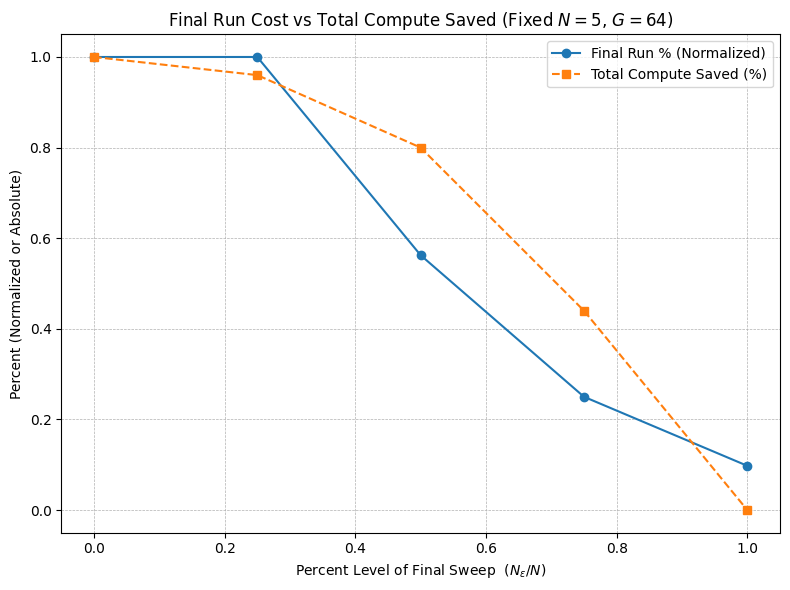

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 5                 # Full depth of sweep
G = 64                # Grid size (fixed)
N_eps_values = np.arange(1, N + 1)  # Final tier counts to test: 2 to N+1

# --- Original normalized target curve ---
with np.errstate(divide='ignore', invalid='ignore'):
    log_term = 4.**(-N_eps_values)
    ratio_sq = (N_eps_values / N)**2
    target = (log_term * ratio_sq)

# Clean invalids
target[~np.isfinite(target)] = np.nan

# Normalize
target_normalized = target / np.nanmax(target)

# --- Compute savings based on tiered grid run ---
def total_cost(up_to, G):
    return G * np.sum(np.arange(1, up_to + 1)**2)

# Full cost (no savings)
cost_full = G*N**2

# Tiered costs and savings
tiered_costs = np.array([total_cost(N_eps, G) for N_eps in np.arange(0, N) ])
percent_saved = 1 - tiered_costs / cost_full  # Fraction saved
percent_saved = np.clip(percent_saved, 0, 1)  # Ensure no negatives

# --- Plot both curves ---
x_vals = (N_eps_values - 1) / np.max(N_eps_values - 1)

plt.figure(figsize=(8, 6))

# First curve: target normalized
plt.plot(x_vals, target_normalized, marker='o', linestyle='-', label='Final Run % (Normalized)')

# Second curve: compute saved
plt.plot(x_vals, percent_saved, marker='s', linestyle='--', label='Total Compute Saved (%)')

# Labels and legend
plt.xlabel(r'Percent Level of Final Sweep  $(N_\epsilon/N)$')
plt.ylabel('Percent (Normalized or Absolute)')
plt.title(r'Final Run Cost vs Total Compute Saved (Fixed $N=5$, $G=64$)')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
target_normalized

array([1.        , 1.        , 0.5625    , 0.25      , 0.09765625])

In [7]:
import numpy as np

def total_cost(N_eps, G):
    # ns = 2^i where i ranges from 0 to N_eps - 1
    indices = np.arange(N_eps)  # tier indices: 0, 1, ..., N_eps - 1
    ns = 2 ** indices
    Gs = G / (4 ** indices)
    return np.sum(Gs * ns**2)

# Setup
N = 5  # Number of tiers to compare
G = 64.0

# Matching your API
tiered_costs = np.array([total_cost(N_eps, G) for N_eps in np.arange(0, N)])
cost_full = G * (2 ** (N - 1))**2  # full-resolution flat cost
percent_saved = 1 - tiered_costs / cost_full

# Optional print
print("Tiered costs:", tiered_costs)
print("Percent saved:", percent_saved)


Tiered costs: [  0.  64. 128. 192. 256.]
Percent saved: [1.         0.99609375 0.9921875  0.98828125 0.984375  ]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plotter(ax_saved, ax_final, N=5, G=64, color=None, label=None):
    N_eps_values = np.arange(1, N + 1)
    tier_cost = G
    cost_full = G * N**2

    tiered_costs = np.array([n * tier_cost + N**2 for n in N_eps_values])
    percent_final = np.array([N**2 / (N**2 + n * tier_cost) for n in N_eps_values])
    percent_saved = 1 - tiered_costs / cost_full
    percent_saved = np.clip(percent_saved, 0, 1)

    x = N_eps_values / N  # Normalized truncation

    ax_saved.plot(x, percent_saved, marker='o', linestyle='-', color=color, label=label)
    ax_final.plot(x, percent_final, marker='o', linestyle='-', color=color)

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

configs = [(2, 256),
           (4, 256),
           (8, 256),
           (16, 256),
           (2, 64),
           (4, 64),
           (8, 64),
           (16, 64),
           (2, 16),
           (4, 16),
           (8, 16),
           (16, 16),
           (2, 4),
           (4, 4),
           (8, 4),
           (16, 4)]
colors = plt.cm.viridis(np.linspace(0, 1, len(configs)))  # nice perceptual colormap

for (N, G), color in zip(configs, colors):
    label = f'N={N}, G={G}'
    plotter(ax1, ax2, N, G, color=color, label=label)

# Labels and Titles
ax1.set_title('% Compute Saved (Versus Big Model Grid Search)')
ax1.set_ylabel('%')
ax1.set_xlabel('Truncation Ratio $N_\\epsilon/N$')
ax1.legend()

ax2.set_title('% Compute Used on Big Model')
ax2.set_ylabel('%')
ax2.set_xlabel('Truncation Ratio $N_\\epsilon/N$')

plt.tight_layout()
plt.show()


256
64
16
4
256
64
16
4
256
64
16
4
256
64
16
4


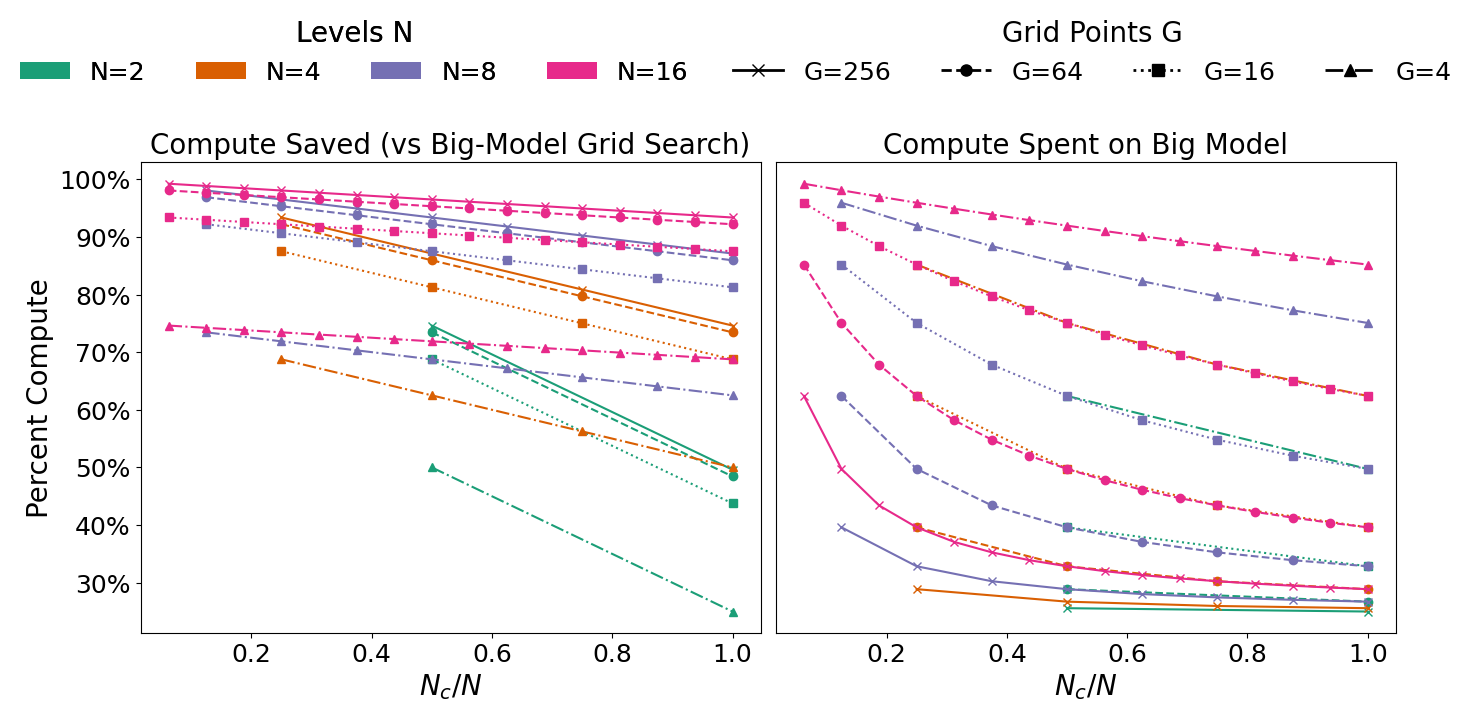

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def plotter(ax_saved, ax_final, *, N, G, color, marker, ls):
    N_eps = np.arange(1, N + 1)
    tier_cost   = G
    cost_full   = G * N**2

    tiered_costs  = N_eps * tier_cost + N**2
    percent_final = N**2              / (N**2 + N_eps * tier_cost)
    percent_saved = 1 - tiered_costs  /  cost_full

    x = N_eps / N

    ax_saved.plot(x, percent_saved, marker=marker, linestyle=ls,
                  color=color)
    ax_final.plot(x, percent_final, marker=marker, linestyle=ls,
                  color=color)

# ── style dictionaries ───────────────────────────────────────────────────────
marker_map    = {256: 'x',  64: 'o', 16: 's',  4: '^'}           # G ↦ marker
linestyle_map = {256: '-',  64: '--', 16: ':', 4: '-.'}          # G ↦ line
color_map     = {  2: '#1b9e77', 4: '#d95f02',
                   8: '#7570b3', 16: '#e7298a'}                  # N ↦ colour

# ── figure scaffold ──────────────────────────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

configs = [(N, G) for N in (2, 4, 8, 16) for G in (256, 64, 16, 4)]


for N, G in configs:
    print(G)
    plotter(ax1, ax2,
            N=N, G=G,
            color=color_map[N],
            marker=marker_map[G],
            ls=linestyle_map[G])

# ── axis cosmetics ───────────────────────────────────────────────────────────
for ax in (ax1, ax2):
    ax.set_xlabel(r'$N_{c} / N$', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))  # 0–100 %

ax1.set_title('Compute Saved (vs Big‑Model Grid Search)', fontsize=20)
ax1.set_ylabel('Percent Compute', fontsize=20)

ax2.set_title('Compute Spent on Big Model', fontsize=20)
ax2.tick_params(axis='y', labelleft=False, left=False)         # hide duplicate y‑ticks

# ── Build separate legends ──────────────────────────────────────────────────
# Color legend for N – use plain coloured rectangles (Patch)
color_handles = [
    Patch(facecolor=color_map[N], edgecolor='none', label=f'N={N}')
    for N in color_map.keys()
]

# Marker/linestyle legend for G
marker_handles = [
    Line2D([0], [0], color='black', marker=marker_map[G],
           linestyle=linestyle_map[G], linewidth=2, markersize=8,
           label=f'G={G}')
    for G in sorted(marker_map.keys(), reverse=True)  # descending for readability
]

# Place legends above subplots
first_legend = fig.legend(handles=color_handles, title='Levels N',
                          loc='upper right', bbox_to_anchor=(0.5, 1.2),
                          ncol=len(color_handles), fontsize=18, title_fontsize=20,
                          frameon=False)

second_legend = fig.legend(handles=marker_handles, title='Grid Points G',
                           loc='upper left', bbox_to_anchor=(0.5, 1.2),
                           ncol=len(marker_handles), fontsize=18, title_fontsize=20,
                           frameon=False)

fig.add_artist(first_legend)  # ensure both legends are drawn

plt.tight_layout()
plt.savefig('compute_tradeoff_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
print(marker_handles)

[<matplotlib.lines.Line2D object at 0x1778dfee0>, <matplotlib.lines.Line2D object at 0x127d293d0>, <matplotlib.lines.Line2D object at 0x127b8e3d0>, <matplotlib.lines.Line2D object at 0x177935400>]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plotter(ax_saved, ax_final, N=5, G=64, color=None, label=None):
    N_eps_values = np.arange(1, N + 1)
    tier_cost = G
    cost_full = G * N**2

    tiered_costs = np.array([n * tier_cost + N**2 for n in N_eps_values])
    percent_final = np.array([N**2 / (N**2 + n * tier_cost) for n in N_eps_values])
    percent_saved = 1 - tiered_costs / cost_full
    percent_saved = np.clip(percent_saved, 0, 1)

    x = N_eps_values / N  # Normalized truncation

    ax_saved.plot(x, percent_saved, marker='o', linestyle='-', linewidth=2, color=color, label=label)
    ax_final.plot(x, percent_final, marker='o', linestyle='--', linewidth=2, color=color)

# Plot setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

configs = [(2, 25), (4, 49), (5, 64), (10, 100), (15, 1000), (15, 9)]
colors = plt.cm.viridis(np.linspace(0, 1, len(configs)))

for (N, G), color in zip(configs, colors):
    label = f'N={N}, G={G}'
    plotter(ax1, ax2, N, G, color=color, label=label)

# Styling
title_size = 18
label_size = 18
tick_size = 16
legend_size = 16

ax1.set_title('% Compute Saved (Versus Big Model Grid Search)', fontsize=title_size)
ax1.set_xlabel('Truncation Ratio $N_c/N$', fontsize=label_size)
ax1.set_ylabel('Percentage (%)', fontsize=label_size)

ax2.set_title('% Compute Used on Big Model', fontsize=title_size)
ax2.set_xlabel('Truncation Ratio $N_c/N$', fontsize=label_size)

# Tick and legend styling
for ax in (ax1, ax2):
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.grid(True, linestyle='--', alpha=0.5)

ax1.legend(fontsize=legend_size, loc='lower left')

# Remove top/right spines for a cleaner look
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('compute_tradeoff_plot.pdf', format='pdf', bbox_inches='tight')
# Or for PNG (300 DPI is standard print quality)
plt.savefig('compute_tradeoff_plot.png', dpi=300, bbox_inches='tight')
plt.show()

